# Comparison between numerical stability curves

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

import numpy as np
from numpy.polynomial import polynomial as pol
import pickle

### Load numerical stability curves

In [2]:
methods = ['Cholesky', 'CGLS', 'C92', 'SOB17', 'TOB20', 
           'deconv_unstable', 'deconv_suboptimal', 'deconv_optimal', 'deconv_overshoot']

In [3]:
stability_curves = []

In [4]:
for method in methods:
    with open(method+'_stability.pickle', 'rb') as f:
        stability_curves.append(pickle.load(f))

### Estimate the slopes of numerical stability curves

In [5]:
lines = []

# define the number of points forming each curve
N = len(stability_curves[0]['model'])

for curve in stability_curves:
    # define the matrix for linear regression
    A = pol.polyvander(curve['model'], 1)
    # define the normal equations
    ATA = A.T@A
    ATd = A.T@curve['data']
    # estimate the coefficients of the straight line
    lines.append(np.linalg.solve(ATA, ATd))

In [6]:
for (method, line) in zip(methods, lines):
    print('kappa_{}: {}'.format(method, line[1]))

kappa_Cholesky: 2.37522045081884
kappa_CGLS: 2.4479427516322514
kappa_C92: 3.129352793943775
kappa_SOB17: 2.777594512645663
kappa_TOB20: 2.4449955577007656
kappa_deconv_unstable: 4.284125230887393
kappa_deconv_suboptimal: 1.6347281533572382
kappa_deconv_optimal: 1.1502633308937222
kappa_deconv_overshoot: 0.9294631788385628


### Plot the results

In [7]:
names = ['$\mathtt{Cholesky}$',
         '$\mathtt{CGLS}$',
         '$\mathtt{C92}$',
         '$\mathtt{SOB17}$',
         '$\mathtt{TOB20}$',
         '$\mathtt{deconv}$ (unstable)',
         '$\mathtt{deconv}$ (suboptimal)',
         '$\mathtt{deconv}$ (optimal)',
         '$\mathtt{deconv}$ (overshoot)']

colors = ['black',
          'red',
          'green',
          'blue',
          'purple',
          'lightgrey', 
          'darkgrey', 
          'magenta',
          'dimgrey']

linestyles = ['-', '-', '-', '-', '-', ':', ':', '-', ':']

markers = ['o', 
           'x',
           '8',
           'v',
           '^',
           'D',
           'D',
           'D',
           'D']

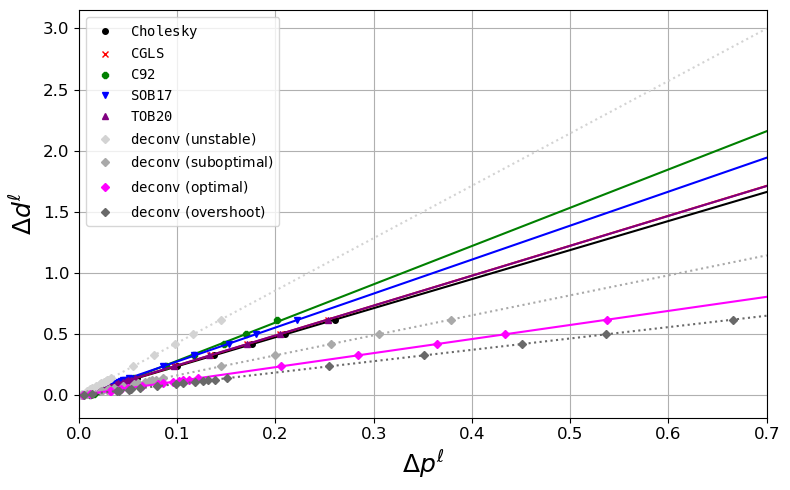

In [8]:
Dp_min = 0
Dp_max = 0.7

fig, ax = plt.subplots(figsize=(8,5))

for (color, linestyle, marker, method, name, line) in zip(colors, linestyles, markers, methods, names, lines):
    ### Open the stability curve
    file_name = method+'_stability.pickle'
    with open(file_name, 'rb') as f:
        numerical_stability_curve = pickle.load(f)
    ### Plot the stability curve line
    Dd_min = line[0] + line[1]*Dp_min
    Dd_max = line[0] + line[1]*Dp_max
    ax.plot([
        Dp_min, Dp_max], [Dd_min, Dd_max],
        linestyle=linestyle, color=color, marker='')
    ### Plot the stability curve points
    ax.plot(
        numerical_stability_curve['model'], 
        numerical_stability_curve['data'], 
        linestyle='', color=color, marker=marker, alpha=1, markersize=4, label=name)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('$\Delta p^{\ell}$', fontsize=18)
ax.set_ylabel('$\Delta d^{\ell}$', fontsize=18)
ax.set_xlim(Dp_min, Dp_max)
ax.grid(True)
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('../manuscript/Fig/stability-comparison.png', dpi= 300)
plt.show()